In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!git clone https://github.com/neheller/kits23
#https://github.com/neheller/kits23/tree/main
#Challenge home page https://kits-challenge.org/kits23/

In [2]:
dataset_dir = "/content/drive/MyDrive/kits23-sample/dataset"

In [3]:
import os
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(sub_indent, f))

dataset_folder_path = '/content/drive/MyDrive/kits23-sample/dataset'
list_files(dataset_folder_path)

In [5]:
!pip install nibabel

In [4]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [59]:
def get_all_case_dirs(root_path):
    """Get all case directories under the root path."""
    paths = [os.path.join(root_path, d) for d in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, d))]
    return paths

def safe_load_nii_gz_data(case_path, filename):
    """Load .nii.gz data using nibabel, return None if file doesn't exist."""
    file_path = os.path.join(case_path, filename)
    if os.path.exists(file_path):
        nii_data = nib.load(file_path)
        return nii_data.get_fdata()
    else:
        print(f"File {file_path} not found.")
        return None

def visualize_slice(data, slice_index):
    """Visualize a slice of the 3D data."""
    plt.imshow(data[slice_index, :, :].T, cmap="gray")
    plt.axis('off')
    plt.show()



['/content/drive/MyDrive/kits23-sample/dataset/.ipynb_checkpoints', '/content/drive/MyDrive/kits23-sample/dataset/case_4', '/content/drive/MyDrive/kits23-sample/dataset/case_5', '/content/drive/MyDrive/kits23-sample/dataset/case_6', '/content/drive/MyDrive/kits23-sample/dataset/case_588', '/content/drive/MyDrive/kits23-sample/dataset/case_7', '/content/drive/MyDrive/kits23-sample/dataset/case_8', '/content/drive/MyDrive/kits23-sample/dataset/case_9', '/content/drive/MyDrive/kits23-sample/dataset/case_1', '/content/drive/MyDrive/kits23-sample/dataset/case_11', '/content/drive/MyDrive/kits23-sample/dataset/case_12', '/content/drive/MyDrive/kits23-sample/dataset/case_13', '/content/drive/MyDrive/kits23-sample/dataset/case_14', '/content/drive/MyDrive/kits23-sample/dataset/case_15', '/content/drive/MyDrive/kits23-sample/dataset/case_16', '/content/drive/MyDrive/kits23-sample/dataset/case_17', '/content/drive/MyDrive/kits23-sample/dataset/case_18', '/content/drive/MyDrive/kits23-sample/data

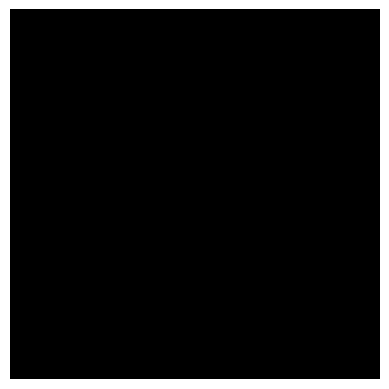

In [60]:
all_case_dirs = get_all_case_dirs(dataset_dir)

print(all_case_dirs)

# Loading segmentations for the first few cases and visualize the first one that works
for case_dir in all_case_dirs[:10]:  # only testing first 10 for quick verification
    if case_dir.endswith('.ipynb_checkpoints') : continue
    segmentation_data = safe_load_nii_gz_data("/content/drive/MyDrive/kits23-sample/dataset/case_0", "segmentation.nii.gz")
    if segmentation_data is not None:
        visualize_slice(segmentation_data, 29)
        break


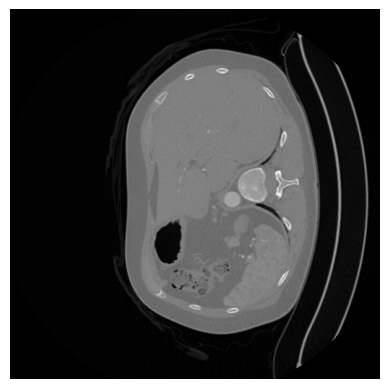

In [66]:
# Loading segmentations for the first few cases and visualize the first one that works
for case_dir in all_case_dirs[:10]:  # only testing first 10 for quick verification
    if case_dir.endswith('.ipynb_checkpoints') : continue
    segmentation_data = safe_load_nii_gz_data("/content/drive/MyDrive/kits23-sample/dataset/case_0", "imaging.nii.gz")
    if segmentation_data is not None:
        visualize_slice(segmentation_data, 60)
        break

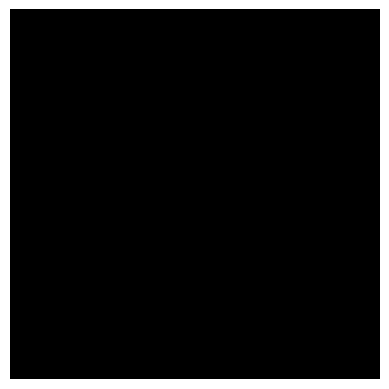

In [67]:
# Loading segmentations for the first few cases and visualize the first one that works
for case_dir in all_case_dirs[:10]:  # only testing first 10 for quick verification
    if case_dir.endswith('.ipynb_checkpoints') : continue
    segmentation_data = safe_load_nii_gz_data("/content/drive/MyDrive/kits23-sample/dataset/case_0/instances", "tumor_instance-1_annotation-1.nii.gz")
    if segmentation_data is not None:
        visualize_slice(segmentation_data, 60)
        break

In [ ]:
#If a case lacks segmentation.nii.gz, it implies that we don't have a reference segmentation for that particular case, making it unsuitable for training (since we wouldn't have a ground truth to compare the model's output to).

In [43]:
#!python "/content/drive/MyDrive/kits23-sample/kits23/annotation/visualize.py" -c case_0 -d "/content/drive/MyDrive/kits23-sample/dataset/case_0/png_axial_view"

/content/drive/MyDrive/kits23-sample/kits23/annotation/visualize.py:81: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  vol = vol.get_data()
/content/drive/MyDrive/kits23-sample/kits23/annotation/visualize.py:82: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  seg = seg.get_data()


#Filtering Out Incomplete Data

### Data Preparation

####Cleaning the dataset by identifying and removing any cases that lack the segmentation.nii.gz file. If a case lacks segmentation.nii.gz, it implies that we don't have a reference segmentation for that particular case, making it unsuitable for training (since we wouldn't have a ground truth to compare the model's output to).

In [ ]:
# to delete
# import os

# # List all cases
# all_cases = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# # Filter cases that have segmentation.nii.gz
# valid_cases = [case for case in all_cases if os.path.exists(os.path.join(dataset_dir, case, "segmentation.nii.gz"))]

# print(f"Total cases: {len(all_cases)}")
# print(f"Valid cases with segmentation: {len(valid_cases)}")


In [5]:
# Helper function to determine if a directory contains at least one instance (kidney, tumor, or cyst)
def contains_instance(case_dir):
    instance_files = os.listdir(case_dir)
    for filename in instance_files:
        if filename.startswith(("kidney", "tumor", "cyst")):
            return True
    return False


In [8]:
import os

# List all cases
all_cases = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# Filter cases that have segmentation.nii.gz and at least one instance
valid_cases = [
    case
    for case in all_cases
    if os.path.exists(os.path.join(dataset_dir, case, "segmentation.nii.gz")) and
    contains_instance(os.path.join(dataset_dir, case, "instances"))
]

print(f"Total cases: {len(all_cases)}")
print(f"Valid cases with segmentation and at least one instance: {len(valid_cases)}")



Total cases: 39
Valid cases with segmentation and at least one instance: 38


In [23]:
# Print the names of the valid cases in order
print("\nNames of valid cases:")
for case_name in sorted(valid_cases):
    print(case_name)



Names of valid cases:
case_0
case_1
case_11
case_12
case_13
case_14
case_15
case_16
case_17
case_18
case_19
case_2
case_21
case_22
case_23
case_24
case_25
case_26
case_27
case_28
case_29
case_3
case_4
case_5
case_579
case_58
case_581
case_582
case_583
case_584
case_585
case_586
case_587
case_588
case_6
case_7
case_8
case_9


In [25]:
set(all_cases) - set(valid_cases)

{'.ipynb_checkpoints'}

#Data Preprocessing

In [9]:
def one_hot_encode(segmentation, num_classes):
    """
    One hot encodes the segmentation mask.
    Args:
    - segmentation : numpy array, the segmentation mask
    - num_classes : int, number of classes
    Returns:
    - one_hot : numpy array, the one-hot encoded mask
    """
    one_hot = np.zeros((*segmentation.shape, num_classes))
    for i in range(num_classes):
        one_hot[..., i] = (segmentation == i)
    return one_hot


In [10]:
def preprocess_data(image, label, num_classes=4):
    """
    Preprocesses the image and label:
    - Resizes to the target shape.
    - Normalizes the image to [0, 1] range.
    - One-hot encodes the label.

    Parameters:
    - image: The MRI image.
    - label: The corresponding label.

    Returns:
    - preprocessed_image: Resized and normalized image.
    - preprocessed_label: Resized and one-hot encoded label.
    """

    # Determine the current shape of the image data
    current_shape = image.shape

    # Calculate the zoom factors
    zoom_factors = (128/current_shape[0], 128/current_shape[1], 64/current_shape[2])

    # Resizing
    resized_image = zoom(image, zoom_factors, mode='nearest')
    resized_label = zoom(label, zoom_factors, order=0, mode='nearest')
    # using order=0 (nearest neighbor) for labels

    # Normalizing image data to [0, 1]
    normalized_image = (resized_image - np.min(resized_image)) / (np.max(resized_image) - np.min(resized_image))

    # One-hot encode the label
    one_hot_label = one_hot_encode(resized_label, num_classes)

    return normalized_image, one_hot_label


#Generator : data is loaded and preprocessed on-the-fly during training

In [28]:
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom


In [29]:
def one_hot_encode(label, num_classes=4):
    """
    One-hot encodes the labels.
    Assumes label values are 0, 1, 2, ... up to num_classes-1.
    """
    return np.eye(num_classes)[label.astype(int)]

In [30]:
 #Each batch is consistent and has a shape (batch_size, 128, 128, 64, 1) for images and (batch_size, 128, 128, 64, num_classes) for labels
def data_generator(case_list, dataset_dir, batch_size=2, image_shape=(128, 128, 64, 1), num_classes=4):
    while True:
        # Randomly sample batch_size cases
        batch_cases = np.random.choice(case_list, size=batch_size)

        batch_images = []
        batch_labels = []

        for case in batch_cases:
            instances_dir = os.path.join(dataset_dir, case, 'instances')

            # List all instance files within the directory
            all_files = os.listdir(instances_dir)

            # Filter out the kidney, cyst, and tumor instances
            image_files = [f for f in all_files if f.startswith("kidney") or f.startswith("tumor") or f.startswith("cyst")]

            if not image_files:
                continue  # If there are no instance files, skip this case

            # Select a random instance for this case (assuming each case might have different instances)
            random_instance = np.random.choice(image_files)

            image_path = os.path.join(instances_dir, random_instance)
            label_path = os.path.join(dataset_dir, case, 'segmentation.nii.gz')

            # Load the image and label
            image = nib.load(image_path).get_fdata()
            label = nib.load(label_path).get_fdata()

            # Preprocess (resize and normalize) the image and label
            image, label = preprocess_data(image, label)

            # One-hot encode the labels
            #label = one_hot_encode(label, num_classes=num_classes)

            batch_images.append(image)
            batch_labels.append(label)

        # Ensure batch size consistency
        while len(batch_images) < batch_size:
            # simply reuse the data from the current batch. This is a basic approach, may change it
            batch_images.extend(batch_images[:batch_size - len(batch_images)])
            batch_labels.extend(batch_labels[:batch_size - len(batch_labels)])

        # Convert lists to numpy arrays and try to reshape them to ensure the consistency
        batch_images = np.array(batch_images)
        batch_labels = np.array(batch_labels)

        # Print the shapes before reshaping
        print("Shapes before reshaping:", batch_images.shape, batch_labels.shape)

        # Now, try reshaping , problem here
        try:
            batch_images = batch_images.reshape((batch_size, *image_shape))
            batch_labels = batch_labels.reshape((batch_size, *image_shape[:-1], num_classes))
        except ValueError as e:
            print(f"Error reshaping for batch: {e}")
            print("Cases in the problematic batch:", batch_cases)
            continue  # Skip the problematic batch

        yield (batch_images, batch_labels)

In [ ]:
# def data_generator(case_list, dataset_dir, batch_size=8, image_shape=(128, 128, 64, 1), num_classes=4):
#     while True:
#         # Randomly sample batch_size cases
#         batch_cases = np.random.choice(case_list, size=batch_size)

#         # Pre-allocate memory for images and labels
#         batch_images = np.zeros((batch_size, *image_shape))
#         batch_labels = np.zeros((batch_size, *image_shape[:-1], num_classes))

#         i = 0
#         for case in batch_cases:
#             instances_dir = os.path.join(dataset_dir, case, 'instances')
#             all_files = os.listdir(instances_dir)
#             image_files = [f for f in all_files if f.startswith("kidney") or f.startswith("tumor") or f.startswith("cyst")]

#             if not image_files:
#                 continue  # If there are no instance files, skip this case

#             random_instance = np.random.choice(image_files)
#             image_path = os.path.join(instances_dir, random_instance)
#             label_path = os.path.join(dataset_dir, case, 'segmentation.nii.gz')

#             image = nib.load(image_path).get_fdata()
#             label = nib.load(label_path).get_fdata()

#             image, label = preprocess_data(image, label)

#             # Insert data into pre-allocated arrays
#             batch_images[i] = image
#             batch_labels[i] = label
#             i += 1

#         yield (batch_images, batch_labels)


#Splitting Dataset into Training and Validation

In [31]:
from sklearn.model_selection import train_test_split
train_cases, val_cases = train_test_split(valid_cases, test_size=0.1)  # Split 10% for validation

In [32]:
batch_size = 2  #change this value if needed

train_gen = data_generator(train_cases, dataset_dir, batch_size=batch_size)
val_gen = data_generator(val_cases, dataset_dir, batch_size=batch_size)

In [33]:
x, y = next(train_gen)
print(x.shape, y.shape)

Shapes before reshaping: (2, 128, 128, 64) (2, 128, 128, 64, 4)
(2, 128, 128, 64, 1) (2, 128, 128, 64, 4)


In [36]:
counter = 0

print("\n-- TRAINING DATA -- ")
for x,y in train_gen.__iter__():
  if counter == 1:
    break
  print(type(x))
  print(f"Shape X: ({len(x)}, {len(x[0]), len(x[1])}")
  print(f"Shape Y: ({y.shape}\n")
  counter += 1


-- TRAINING DATA -- 
Shapes before reshaping: (2, 128, 128, 64) (2, 128, 128, 64, 4)
<class 'numpy.ndarray'>
Shape X: (2, (128, 128)
Shape Y: ((2, 128, 128, 64, 4)

Shapes before reshaping: (2, 128, 128, 64) (2, 128, 128, 64, 4)


#Model

###Define the U-Net Model

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, Concatenate

In [11]:
!pip install keras-unet

In [14]:
from keras_unet.models import custom_unet

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [13]:
def unet_model(input_shape=(128, 128, 64, 1), num_classes=4):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(p1)

    # Decoder
    u1 = UpSampling3D((2, 2, 2))(c2)
    c3 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(u1)
    merge1 = Concatenate()([c3, c1])

    c4 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(merge1)

    # Segmentation Map
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c4)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

model = unet_model()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 64, 1)]    0         []                            
                                                                                                  
 conv3d (Conv3D)             (None, 128, 128, 64, 32)     896       ['input_1[0][0]']             
                                                                                                  
 max_pooling3d (MaxPooling3  (None, 64, 64, 32, 32)       0         ['conv3d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv3d_1 (Conv3D)           (None, 64, 64, 32, 64)       55360     ['max_pooling3d[0][0]']   

In [10]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 5.6 MB/s eta 0:00:00


In [24]:
!pip install keras

In [26]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

ModuleNotFoundError: ignored

##Complie Model

In [39]:
# Compile the model (may need to change metrix here)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#Train Model

In [40]:
# Number of steps per epoch should be the number of batches of data  per epoch
steps_per_epoch = len(train_cases) // batch_size
validation_steps = len(val_cases) // batch_size  # similar calculation for validation data

In [ ]:
num_epochs = 50
# Reduced for debugging
debug_steps_per_epoch = 5
history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    #steps_per_epoch=debug_steps_per_epoch,
    epochs=num_epochs,
    validation_data=val_gen,
    validation_steps=validation_steps
)

Shapes before reshaping: (2, 128, 128, 64) (2, 128, 128, 64, 4)
Epoch 1/50
Shapes before reshaping: (2, 128, 128, 64) (2, 128, 128, 64, 4)
